# Chapter 9. Combining Tabular Data

In many situtions, the information you need is spread across multiple data sets, so you will need to combine multiple data sets into one. In this chapter, we explore how to combine information from multiple (tabular) data sets.

As a working example, we will use the baby names data collected by the Social Security Administration. Each data set in this collection contains the names of all babies born in the United States in a particular year. This data is [publicly available](https://www.ssa.gov/OACT/babynames/limits.html), and a copy has been made available at `/data301/data/names/`.

In [1]:
!ls /data301/data/names

NationalReadMe.pdf  yob1907.txt  yob1935.txt  yob1963.txt  yob1991.txt
yob1880.txt	    yob1908.txt  yob1936.txt  yob1964.txt  yob1992.txt
yob1881.txt	    yob1909.txt  yob1937.txt  yob1965.txt  yob1993.txt
yob1882.txt	    yob1910.txt  yob1938.txt  yob1966.txt  yob1994.txt
yob1883.txt	    yob1911.txt  yob1939.txt  yob1967.txt  yob1995.txt
yob1884.txt	    yob1912.txt  yob1940.txt  yob1968.txt  yob1996.txt
yob1885.txt	    yob1913.txt  yob1941.txt  yob1969.txt  yob1997.txt
yob1886.txt	    yob1914.txt  yob1942.txt  yob1970.txt  yob1998.txt
yob1887.txt	    yob1915.txt  yob1943.txt  yob1971.txt  yob1999.txt
yob1888.txt	    yob1916.txt  yob1944.txt  yob1972.txt  yob2000.txt
yob1889.txt	    yob1917.txt  yob1945.txt  yob1973.txt  yob2001.txt
yob1890.txt	    yob1918.txt  yob1946.txt  yob1974.txt  yob2002.txt
yob1891.txt	    yob1919.txt  yob1947.txt  yob1975.txt  yob2003.txt
yob1892.txt	    yob1920.txt  yob1948.txt  yob1976.txt  yob2004.txt
yob1893.txt	    yob1921.txt  yob1949.txt  yob1977.txt  yob

# 9.1 Concatenating and Merging Data

# Concatenation

Sometimes, the _rows_ of data are spread across multiple files, and we want to combine the rows into a single data set. The process of combining rows from different data sets is known as **concatenation**. Visually, to concatenate two or more `DataFrame`s means to stack them on top of one another.

![](concatenate.png)

For example, suppose we want to understand how the popularity of different names evolved between 1995 and 2015. The 1995 names and the 2015 names are stored in two different files: `yob1995.txt` and `yob2015.txt`, respectively. To carry out this analysis, we will need to combine these two data sets into one.

In [2]:
import pandas as pd
pd.options.display.max_rows = 10

names1995 = pd.read_csv("http://github.com/dlsun/data-science-book/blob/master/data/names/yob1995.txt?raw=true",
                        header=None,
                        names=["Name", "Sex", "Count"])
names1995

,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
26075,Zerek,M,5
26076,Zhen,M,5
26077,Ziggy,M,5
26078,Zuberi,M,5


In [3]:
names2015 = pd.read_csv("http://github.com/dlsun/data-science-book/blob/master/data/names/yob2015.txt?raw=true",
                        header=None,
                        names=["Name", "Sex", "Count"])
names2015

,Name,Sex,Count
0,Emma,F,20355
1,Olivia,F,19553
2,Sophia,F,17327
3,Ava,F,16286
4,Isabella,F,15504
...,...,...,...
32947,Zykell,M,5
32948,Zyking,M,5
32949,Zykir,M,5
32950,Zyrus,M,5


To concatenate the two, we use the `pd.concat()` function, which accepts a _list_ of `pandas` objects (`DataFrames` or `Series`) and concatenates them.

In [4]:
pd.concat([names1995, names2015])

,Name,Sex,Count
0,Jessica,F,27935
1,Ashley,F,26603
2,Emily,F,24378
3,Samantha,F,21646
4,Sarah,F,21369
...,...,...,...
32947,Zykell,M,5
32948,Zyking,M,5
32949,Zykir,M,5
32950,Zyrus,M,5


There are two problems with the combined data set above. First, there is no longer any way to distinguish the 1995 data from the 2015 data. To fix this, we can add a "Year" column to each `DataFrame` before we concatenate. Second, the indexes from the individual `DataFrame`s have been preserved. (To see this, observe that the last index in the `DataFrame` is 32,951, which corresponds to the number of rows in `names2015`, but there are actually 59,032 rows in the `DataFrame`.) That means that there are two rows with an index of 0, two rows with an index of 1, and so on. To force `pandas` to create a completely new index for this `DataFrame`, ignoring the indices from the individual `DataFrame`s, we specify `ignore_index=True`.

In [5]:
names1995["Year"] = 1995
names2015["Year"] = 2015
names = pd.concat([names1995, names2015], ignore_index=True)
names

,Name,Sex,Count,Year
0,Jessica,F,27935,1995
1,Ashley,F,26603,1995
2,Emily,F,24378,1995
3,Samantha,F,21646,1995
4,Sarah,F,21369,1995
...,...,...,...,...
59027,Zykell,M,5,2015
59028,Zyking,M,5,2015
59029,Zykir,M,5,2015
59030,Zyrus,M,5,2015


Now this is a `DataFrame` that we can use!

Notice that the data is currently in tabular form, with one row per combination of name, sex, and year. It makes sense to set these to be the index of our `DataFrame`.

In [6]:
names.set_index(["Name", "Sex", "Year"], inplace=True)
names

,,,Count
Name,Sex,Year,
Jessica,F,1995,27935
Ashley,F,1995,26603
Emily,F,1995,24378
Samantha,F,1995,21646
Sarah,F,1995,21369
...,...,...,...
Zykell,M,2015,5
Zyking,M,2015,5
Zykir,M,2015,5


We may want to show the counts for the two years side by side. In other words, we want a data cube with (name, sex) along one axis and year along the other. To do this, we can `.unstack()` the year from the index, just as we did in Chapter 2.

In [7]:
names.unstack("Year")

Count      
Year           1995  2015
Name      Sex            
Aaban     M     NaN  15.0
Aabha     F     NaN   7.0
Aabriella F     NaN   5.0
Aada      F     NaN   5.0
Aadam     M     6.0  22.0
...             ...   ...
Zyrion    M     NaN   7.0
Zyron     M     NaN  15.0
Zyrus     M     NaN   5.0
Zyus      M     NaN   5.0
Zyvon     M     NaN   6.0

[43392 rows x 2 columns]

The `NaN`s simply indicate that there were no children (more precisely, if you read [the documentation](https://www.ssa.gov/OACT/babynames/limits.html), fewer than five children) born in the United States in that year. In this case, it makes sense to fill these `NaN` values with 0.

In [8]:
names.unstack().fillna(0)

Count      
Year           1995  2015
Name      Sex            
Aaban     M     0.0  15.0
Aabha     F     0.0   7.0
Aabriella F     0.0   5.0
Aada      F     0.0   5.0
Aadam     M     6.0  22.0
...             ...   ...
Zyrion    M     0.0   7.0
Zyron     M     0.0  15.0
Zyrus     M     0.0   5.0
Zyus      M     0.0   5.0
Zyvon     M     0.0   6.0

[43392 rows x 2 columns]

# Merging (a.k.a. Joining)

More commonly, the data sets that we want to combine actually contain different information about the same observations. In other words, instead of stacking the `DataFrame`s on top of each other, as in concatenation, we want to stack them next to each other. The process of combining columns or variables from different data sets is known as **merging** or **joining**.

![](merge.png)

The observations in the two data sets may not be in the same order, so merging is not as simple as stacking the `DataFrame`s side by side. For example, the process might look as follows:

![](one-to-one.png)

In _pandas_, merging is accomplished using the `.merge()` function. We have to specify the variable(s) that we want to match across the two data sets. For example, to merge the 1995 names with the 2015 names, we have to join on name and sex.

In [9]:
names1995.merge(names2015, on=["Name", "Sex"])

,Name,Sex,Count_x,Year_x,Count_y,Year_y
0,Jessica,F,27935,1995,1577,2015
1,Ashley,F,26603,1995,3409,2015
2,Emily,F,24378,1995,11727,2015
3,Samantha,F,21646,1995,5304,2015
4,Sarah,F,21369,1995,4476,2015
...,...,...,...,...,...,...
15635,Zephan,M,5,1995,23,2015
15636,Zeppelin,M,5,1995,69,2015
15637,Zerek,M,5,1995,5,2015
15638,Ziggy,M,5,1995,44,2015


The variables `Name` and `Sex` that we joined on each appear once in the resulting `DataFrame`. The variable `Count`, which we did not join on, appears twice---since there are columns called `Count` in both `DataFrame`s. Notice that `pandas` automatically appended the suffix `_x` to the name of the variable from the left data set and `_y` to the name from the right. We can customize the suffixes by specifying the `suffixes=` argument.

In [10]:
names1995.merge(names2015, on=["Name", "Sex"], suffixes=("1995", "2015"))

,Name,Sex,Count1995,Year1995,Count2015,Year2015
0,Jessica,F,27935,1995,1577,2015
1,Ashley,F,26603,1995,3409,2015
2,Emily,F,24378,1995,11727,2015
3,Samantha,F,21646,1995,5304,2015
4,Sarah,F,21369,1995,4476,2015
...,...,...,...,...,...,...
15635,Zephan,M,5,1995,23,2015
15636,Zeppelin,M,5,1995,69,2015
15637,Zerek,M,5,1995,5,2015
15638,Ziggy,M,5,1995,44,2015


In the code above, we assumed that the columns that we joined on had the same names in the two data sets. What if they had different names? For example, suppose the columns had been lowercase in one and uppercase in the other. We can specify which variables to use from the left and right data sets using the `left_on=` and `right_on=` arguments.

In [11]:
# Create new DataFrames where the column names are different
names1995_lower = names1995.copy()
names2015_upper = names2015.copy()
names1995_lower.columns = names1995.columns.str.lower()
names2015_upper.columns = names2015.columns.str.upper()

# This is how you merge them.
names1995_lower.merge(
    names2015_upper,
    left_on=("name", "sex"),
    right_on=("NAME", "SEX")
)

,name,sex,count,year,NAME,SEX,COUNT,YEAR
0,Jessica,F,27935,1995,Jessica,F,1577,2015
1,Ashley,F,26603,1995,Ashley,F,3409,2015
2,Emily,F,24378,1995,Emily,F,11727,2015
3,Samantha,F,21646,1995,Samantha,F,5304,2015
4,Sarah,F,21369,1995,Sarah,F,4476,2015
...,...,...,...,...,...,...,...,...
15635,Zephan,M,5,1995,Zephan,M,23,2015
15636,Zeppelin,M,5,1995,Zeppelin,M,69,2015
15637,Zerek,M,5,1995,Zerek,M,5,2015
15638,Ziggy,M,5,1995,Ziggy,M,44,2015


What if the "variables" that we want to join on are in the index? We can always call `.reset_index()` to make them columns, but we can also specify the arguments `left_index=True` or `right_index=True` to force `pandas` to use the index instead of columns.

In [12]:
names1995_idx = names1995.set_index(["Name", "Sex"])
names1995_idx

,,Count,Year
Name,Sex,,
Jessica,F,27935,1995
Ashley,F,26603,1995
Emily,F,24378,1995
Samantha,F,21646,1995
Sarah,F,21369,1995
...,...,...,...
Zerek,M,5,1995
Zhen,M,5,1995
Ziggy,M,5,1995


In [13]:
names1995_idx.merge(names2015, left_index=True, right_on=("Name", "Sex"))

,Count_x,Year_x,Name,Sex,Count_y,Year_y
205,27935,1995,Jessica,F,1577,2015
84,26603,1995,Ashley,F,3409,2015
7,24378,1995,Emily,F,11727,2015
39,21646,1995,Samantha,F,5304,2015
57,21369,1995,Sarah,F,4476,2015
...,...,...,...,...,...,...
23370,5,1995,Zephan,M,23,2015
21047,5,1995,Zeppelin,M,69,2015
32933,5,1995,Zerek,M,5,2015
21743,5,1995,Ziggy,M,44,2015


Note that this worked because the left `DataFrame` had an index with two levels, which were joined to two columns from the right `DataFrame`.

# One-to-One and Many-to-One Relationships

In the example above, there was at most one (name, sex) combination in the 2015 data set for each (name, sex) combination in the 1995 data set. These two data sets are thus said to have a **one-to-one relationship**. Another example of a one-to-one data set is the Beatles example from above. Each Beatle appears in each data set exactly once, so the name is uniquely identifying.

![](one-to-one.png)

However, two data sets need not have a one-to-one relationship. For example, a data set that specifies the instrument(s) that each Beatle played would potentially feature each Beatle multiple times (if they played multiple instruments). If we joined this data set to the "Beatles career" data set, then each row in the "Beatles career" data set would be mapped to several rows in the "instruments" data set. These two data sets are said to have a **many-to-one relationship**.

![](many-to-one.png)

# Many-to-Many Relationships: A Cautionary Tale

In the baby names data, the name is not uniquely identifying. For example, there are both males and females with the name "Jessie".

In [14]:
jessie1995 = names1995[names1995["Name"] == "Jessie"]
jessie2015 = names2015[names2015["Name"] == "Jessie"]

jessie1995

,Name,Sex,Count,Year
248,Jessie,F,1138,1995
16047,Jessie,M,903,1995


That is why we have to be sure to join on both name and sex. But what would go wrong if we joined these two `DataFrame`s on just "Name"? Let's try it out:

In [15]:
jessie1995.merge(jessie2015, on=["Name"])

,Name,Sex_x,Count_x,Year_x,Sex_y,Count_y,Year_y
0,Jessie,F,1138,1995,F,466,2015
1,Jessie,F,1138,1995,M,232,2015
2,Jessie,M,903,1995,F,466,2015
3,Jessie,M,903,1995,M,232,2015


We see that Jessie ends up appearing four times.

- Female Jessies from 1995 are matched with female Jessies from 2015. (Good!)
- Male Jessies from 1995 are matched with male Jessies from 2015. (Good!)
- Female Jessies from 1995 are matched with male Jessies from 2015. (Huh?)
- Male Jessies from 1995 are matched with female Jessies from 2015. (Huh?)

The problem is that there were multiple Jessies in the 1995 data and multiple Jessies in the 2015 data. We say that these two data sets have a **many-to-many relationship**.

# Exercises

**Exercise 1.** Make a line plot showing the popularity of your name over the years. How popular was your name in the year you were born? 

(If you have a rare name that does not appear in the data set, choose a friend's name.)

In [141]:
from glob import glob
import re

filenames = sorted(glob("/data301/data/names/*.txt"), key=lambda f: int(''.join(filter(str.isdigit, f))))
#filenames = ["/data301/data/names/yob1998.txt", "/data301/data/names/yob1999.txt"]
names_df = pd.DataFrame()
for file in filenames:
    df = pd.read_csv(file, header=None, names=["Name", "Sex", "Count"])
    df['Year'] = int(re.search('/data301/data/names/yob(.*).txt',
              file).groups()[0])
    df = df.set_index(["Year", "Name"])
    names_df = names_df.append(df)

Sex
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

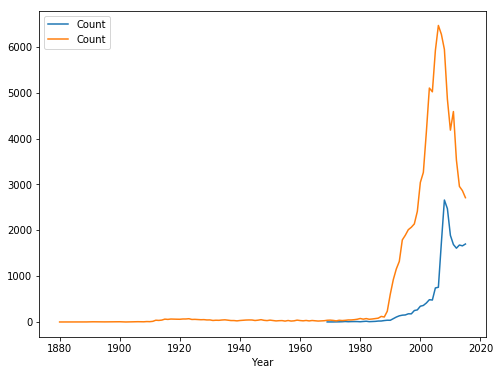

In [143]:
import matplotlib.pyplot as plt

idx = pd.IndexSlice
fig, ax = plt.subplots(figsize=(8,6))
names_df.loc[idx[:, "Hayden"], :].reset_index().set_index("Year").groupby("Sex").plot(ax=ax)

Exercises 2-4 deal with the Movielens data (`/data301/data/ml-1m/`), which is a collection of movie ratings submitted by users. The information about the movies, ratings, and users are stored in three separate files, called `movies.dat`, `ratings.dat`, and `users.dat`. The column names are not included with the data files. Refer to the data documentation (`/data301/data/ml-1m/README`) for the column names and how the columns correspond across the data sets.

**Exercise 2.** Who's more generous with ratings: males or females? Calculate the average of the ratings given by male users, and the average of the ratings given by female users.

In [ ]:
# TYPE YOUR CODE HERE

**Exercise 3.** Among movies with at least 100 ratings, which movie had the highest average rating?

In [ ]:
# TYPE YOUR CODE HERE

**Exercise 4.** For each movie, calculate the average age of the users who rated it and the average rating. Make a scatterplot showing the relationship between age and rating, with each point representing a movie. (Optional: Use the size of each point to represent the number of users who rated the movie.)

In [ ]:
# TYPE YOUR CODE HERE